# Damped Driven Pendulum

The net force on a damped, driven pendulum is a combination of gravitational force, friction and the driving force:
$$
  m\vec{a} = \vec{F}_g + \vec{F}_r + \vec{F}_d
$$

We assume a sinusoidal driving force with angular frequency $\omega_0$.
$$ F_d(t) = F_0 \cos\omega_0t $$

The resistive or damping force is proportional to the velocity:
$$ F_r = -\kappa v $$

The pendulum has constant length, the only free parameter is therefore the elongation angle $\theta$, and we can chose a dynamical variable vector with angle $\theta$ and angular velocity $\omega$.
$$
\vec{y} = \left(\begin{array}{c}
\theta \\ \omega
\end{array}\right)
$$

The angular acceleration $\alpha$ can be calculated from the tangential component of the force.
$$
mr\alpha = g\sin\theta - \kappa v + F_0 \cos\omega_0t
$$

We can write down the ODE to be solved explicitly before we encode the information in the generalized velocity vector.
$$
  \frac{d^2\theta}{dt^2} + \frac{\kappa}{m} \frac{d\theta}{dt} - \frac{g}{m}\sin{\theta}
  = \frac{F_0}{mr} \cos\omega_0t
$$

We introduce a few abbreviations before we introduce the generalized velocity vector
$$
  q = \frac{\kappa}{m}
  \qquad
  b = \frac{F_0}{mr}
$$

Furthermore, we will assume $g/m=1$ to make the equation dimensionless.

This gives us the generalized velocity vector
$$
\vec{g}(\vec{y},t) = \vec{u}'
= \left(\begin{array}{c}
\omega \\ \alpha
\end{array}\right)
= \left(\begin{array}{c}
\omega \\ b \cos\omega_0t + q - \sin\theta
\end{array}\right)
$$



In [1]:
import numpy as np
from numpy import cos,sin
import matplotlib.pyplot as plt

In [2]:
def rk4(func,t,y0):
    y = np.zeros((len(t),len(y0)))
    y[0] = y0

    for i in range(len(t)-1):
    
        dt = t[i+1] - t[i]
        
        k1 = dt * func( t[i]          , y[i]          )
        k2 = dt * func( t[i] + 0.5*dt , y[i] + 0.5*k1 )
        k3 = dt * func( t[i] + 0.5*dt , y[i] + 0.5*k2 )
        k4 = dt * func( t[i] + 1.0*dt , y[i] + 1.0*k1 )

        y[i+1] = y[i] + 1./6. * ( k1 + 2*k2 + 2*k3 + k4)

    return y

In [3]:
class genvelocity:
    def __init__(self,q,b,omega0=1):
        self.q = q
        self.b = b
        self.w = omega0

    def __call__(self,t,y):
        return np.array([y[1], self.b*cos(self.w*t) - self.q*y[1] - sin(y[0])])

# 4th-order Runge-Kutta Method

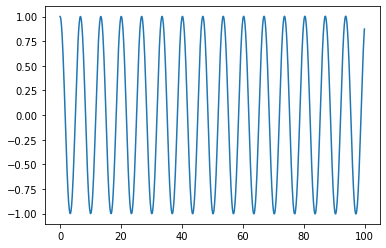

In [4]:
g = genvelocity(q=0,b=0)
t = np.arange(0, 100, 1e-1)
y = rk4(g,t,[1,0])

plt.plot(t,y[:,0]);

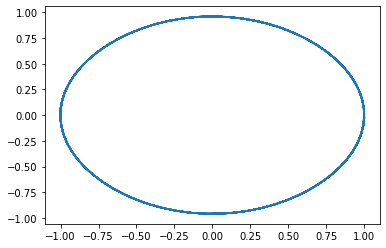

In [5]:
plt.plot(y[:,0], y[:,1]);

In [6]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

def draw_pendulum(step):
    fig, ax = plt.subplots()
    ax.set_xlim([-1.5,1.5])
    ax.set_ylim([-1.1,1.1])

    theta = y[step,0]
    
    line = mlines.Line2D([0,sin(theta)], [0,-cos(theta)], lw=3., alpha=1)
    circle = mpatches.Circle([sin(theta),-cos(theta)], 0.05, fc="red", ec="none", alpha=1)

    ax.add_line(line)
    ax.add_patch(circle)
    
#     display(fig)
    return fig
    
    

In [7]:
# from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def anim(y):
    play = widgets.Play(
        value=0, min=0, max=len(y)-1, step=1,
        #     interval=100,
        description="Press play", disabled=False)

    slider = widgets.IntSlider(max=len(y)-1)
    widgets.jslink((play, 'value'), (slider, 'value'))
    ui = widgets.HBox([play, slider])

    out = widgets.interactive_output(draw_pendulum, {'step': play})

    display(ui,out)
    

In [8]:
anim(y)

Output()

In [9]:
g = genvelocity(q=0.2, b=0.0)
t = np.arange(0, 100, 1e-1)
y = rk4(g,t,[2,0])

# plt.plot(t,y[:,0])
anim(y)

Output()

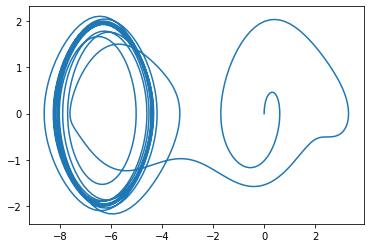

In [10]:
g = genvelocity(q=0.1, b=0.7, omega0=0.98)
t = np.arange(0, 100, 1e-1)
y = rk4(g,t,[0,0])

plt.plot(y[:,0], y[:,1])
# anim(y)

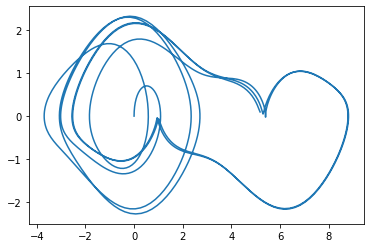

In [11]:
g = genvelocity(q=0.5, b=1.15, omega0=2./3.)
t = np.arange(0, 100, 1e-1)
y = rk4(g,t,[0,0])

plt.plot(y[:,0], y[:,1])
# anim(y)